In [1]:
from tensorflow.keras.layers import Dense, Layer, Input, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def create_model():
    input_tensor = Input(shape=(28,28))
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    return model

def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    oh_labels = to_categorical(labels)
    
    return images, oh_labels

def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, 
                             valid_size = 0.15, random_state=23):
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels,
                                                                   test_size= valid_size, random_state = random_state)
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

In [2]:
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels)

print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000, 10)


In [3]:
from tensorflow.keras.optimizers import Adam

model = create_model()
model.summary()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=20,
                   validation_data=(val_images, val_oh_labels))

Epoch 1/20
1594/1594 [==============================] - 3s 1ms/step - loss: 0.7079 - accuracy: 0.7530 - val_loss: 0.4089 - val_accuracy: 0.8586
Epoch 2/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.4021 - accuracy: 0.8569 - val_loss: 0.3661 - val_accuracy: 0.8657
Epoch 3/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.3483 - accuracy: 0.8745 - val_loss: 0.3615 - val_accuracy: 0.8648
Epoch 4/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.3282 - accuracy: 0.8810 - val_loss: 0.3424 - val_accuracy: 0.8752
Epoch 5/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.8894 - val_loss: 0.3363 - val_accuracy: 0.8836
Epoch 6/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2968 - accuracy: 0.8917 - val_loss: 0.3260 - val_accuracy: 0.8824
Epoch 7/20
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2806 - accuracy: 0.8943 - val_loss: 0.3295 - val_accuracy:

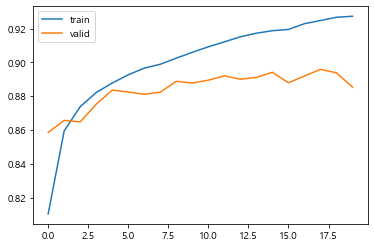

In [30]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
show_history(history)

In [31]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 1ms/step - loss: 0.3818 - accuracy: 0.8797


[0.38176432251930237, 0.8797000050544739]

## Callback

#### ModelCheckpoint(filepath, monitor='val_loss',verbose=0,save_best_only=False, save_weights_only=False,mode='auto', period=1)

- 특정 조건에 맞춰서 모델을 파일로 저장
- filepath : weights.{epoch:02d}-{val_loss:.2f}.hdf5라면 파일 이름에 세대 번호와 검증 손실을 너헝 모델의 체크포인트가 저장
- monitor : monitor할 지표(loss, 평가지표)
- mode : 모니터지표가 감소해야 좋을경우 min, 증가해야좋을 경우 max

In [41]:
!cd

C:\Users\김상헌\혼자공부


In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='C:/Users/김상헌/혼자공부/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss',
                        save_best_only=True, save_weights_only=True, mode='min', period=5, verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=10, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb])

Epoch 1/10
1594/1594 [==============================] - 4s 2ms/step - loss: 0.6980 - accuracy: 0.7579 - val_loss: 0.4093 - val_accuracy: 0.8560
Epoch 2/10
1594/1594 [==============================] - 2s 1ms/step - loss: 0.4005 - accuracy: 0.8575 - val_loss: 0.3738 - val_accuracy: 0.8651
Epoch 3/10
1594/1594 [==============================] - 2s 1ms/step - loss: 0.3581 - accuracy: 0.8698 - val_loss: 0.3668 - val_accuracy: 0.8659
Epoch 4/10
1594/1594 [==============================] - 2s 1ms/step - loss: 0.3285 - accuracy: 0.8810 - val_loss: 0.3567 - val_accuracy: 0.8722
Epoch 5/10
1594/1594 [==============================] - 2s 1ms/step - loss: 0.3044 - accuracy: 0.8868 - val_loss: 0.3332 - val_accuracy: 0.8790

Epoch 00005: val_loss improved from inf to 0.33319, saving model to C:/Users/김상헌/혼자공부\weights.05-0.33.hdf5
Epoch 6/10
1594/1594 [==============================] - 2s 1ms/step - loss: 0.2929 - accuracy: 0.8926 - val_loss: 0.3240 - val_accuracy: 0.8823
Epoch 7/10
1594/1594 [======

#### ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

- 특정 epochs 횟수동안 성능이 개선되지 않으면 learning rate를 동적으로 감소 시킴
- factor : 학습 속도를 줄일 인수, new_lr = lr * factor
- patience : learning rate 줄이기 전에 모니터링할 epoch 횟수

In [6]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                    callbacks = [rlr_cb])

Epoch 1/30
399/399 [==============================] - 1s 2ms/step - loss: 0.8305 - accuracy: 0.7180 - val_loss: 0.4645 - val_accuracy: 0.8346
Epoch 2/30
399/399 [==============================] - 1s 2ms/step - loss: 0.4294 - accuracy: 0.8488 - val_loss: 0.4329 - val_accuracy: 0.8478
Epoch 3/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3851 - accuracy: 0.8629 - val_loss: 0.3750 - val_accuracy: 0.8677
Epoch 4/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3468 - accuracy: 0.8761 - val_loss: 0.3617 - val_accuracy: 0.8696
Epoch 5/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 0.8784 - val_loss: 0.3448 - val_accuracy: 0.8752
Epoch 6/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8824 - val_loss: 0.3314 - val_accuracy: 0.8826
Epoch 7/30
399/399 [==============================] - 1s 1ms/step - loss: 0.2983 - accuracy: 0.8928 - val_loss: 0.3346 - val_accuracy: 0.8811
Epoch 

#### EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

- 특정 epochs 동안 성능이 개선되지 않을 시 학습을 조기에 중단
- patience : Early stopping 적용 전에 모니터링할 epochs 횟수
- 계속 학습시켜봐야 overfitting만 되고 성능이 개선되지 않을 경우를 방지하기 위해 사용

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                    callbacks = [ely_cb]) 

Epoch 1/30
399/399 [==============================] - 1s 2ms/step - loss: 0.9062 - accuracy: 0.6920 - val_loss: 0.4245 - val_accuracy: 0.8522
Epoch 2/30
399/399 [==============================] - 1s 2ms/step - loss: 0.4248 - accuracy: 0.8488 - val_loss: 0.3864 - val_accuracy: 0.8628
Epoch 3/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3785 - accuracy: 0.8660 - val_loss: 0.3714 - val_accuracy: 0.8693
Epoch 4/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8764 - val_loss: 0.3721 - val_accuracy: 0.8646
Epoch 5/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3316 - accuracy: 0.8791 - val_loss: 0.3616 - val_accuracy: 0.8679
Epoch 6/30
399/399 [==============================] - 1s 2ms/step - loss: 0.3145 - accuracy: 0.8862 - val_loss: 0.3292 - val_accuracy: 0.8842
Epoch 7/30
399/399 [==============================] - 1s 2ms/step - loss: 0.2954 - accuracy: 0.8927 - val_loss: 0.3212 - val_accuracy: 0.8846
Epoch 